In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from rggrader import submit
from rggrader import submit_image

In [2]:
url = 'fifa21_raw_data.csv'
fifa_df = pd.read_csv(url, low_memory=False)
fifa_df

,Unnamed: 0,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,...,High,Low,5 ★,89,93,81,89,35,77,562
2,2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,...,High,High,4 ★,76,86,93,88,64,78,207
4,4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,...,High,Medium,5 ★,91,85,86,94,36,59,595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,18974,247223,Xia Ao,Ao Xia,China PR,21,47,55,\n\n\n\nWuhan Zall,2018 ~ 2022,...,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,18975,258760,B. Hough,Ben Hough,England,17,47,67,\n\n\n\nOldham Athletic,2020 ~ 2021,...,Medium,Medium,1 ★,64,40,48,49,35,45,NaN
18976,18976,252757,R. McKinley,Ronan McKinley,England,18,47,65,\n\n\n\nDerry City,2019 ~ 2020,...,Medium,Medium,1 ★,63,39,44,46,40,53,NaN
18977,18977,243790,Wang Zhen'ao,Zhen'ao Wang,China PR,20,47,57,\n\n\n\nDalian YiFang FC,2020 ~ 2022,...,Medium,Medium,1 ★,58,49,41,49,30,44,NaN


## Data Cleaning

In [3]:
# remove column labeled `Unnamed: 0`, which does not make a significant contribution to our data analysis needs.
fifa_df = fifa_df.drop(columns='Unnamed: 0')
fifa_df.head(10)

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Positions,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",...,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",...,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,...,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",...,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",...,High,Medium,5 ★,91,85,86,94,36,59,595
5,188545,R. Lewandowski,Robert Lewandowski,Poland,31,91,91,\n\n\n\nFC Bayern München,2014 ~ 2023,ST,...,High,Medium,4 ★,78,91,78,85,43,82,248
6,209331,M. Salah,Mohamed Salah,Egypt,28,90,90,\n\n\n\nLiverpool,2017 ~ 2023,RW,...,High,Medium,3 ★,93,86,81,90,45,75,246
7,212831,Alisson,Alisson Ramses Becker,Brazil,27,90,91,\n\n\n\nLiverpool,2018 ~ 2024,GK,...,Medium,Medium,3 ★,86,88,85,89,51,91,120
8,231747,K. Mbappé,Kylian Mbappé,France,21,90,95,\n\n\n\nParis Saint-Germain,2018 ~ 2022,"ST, LW, RW",...,High,Low,3 ★,96,86,78,91,39,76,1.6K
9,192448,M. ter Stegen,Marc-André ter Stegen,Germany,28,90,93,\n\n\n\nFC Barcelona,2014 ~ 2022,GK,...,Medium,Medium,3 ★,88,85,88,90,45,88,130


In [4]:
# removing the newline characters (`\n`) from the dataset
data_cleaned = fifa_df.applymap(
    lambda x: x.replace('\n', '').strip() if isinstance(x, str) else x
)

/var/folders/kj/qd6f5j_d3ss0gnm3b2jcqslh0000gn/T/ipykernel_50326/3221954100.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_cleaned = fifa_df.applymap(


In [5]:
# Removing 'Star' Characters
data_cleaned = data_cleaned.applymap(
    lambda x: x.replace('★', '') if isinstance(x, str) else x
)

/var/folders/kj/qd6f5j_d3ss0gnm3b2jcqslh0000gn/T/ipykernel_50326/454840469.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_cleaned = data_cleaned.applymap(


In [6]:
# Filling Missing Values
data_cleaned = data_cleaned.fillna(0)

In [7]:
# Cleaning and Converting Financial Data
data_cleaned['Value'] = data_cleaned['Value'].apply(
    lambda x: x.replace('€', '').replace('M', 'e6').replace('K', 'e3')
    if isinstance(x, str) else x
)

In [8]:
# showing the first 10 rows of the cleaned dataset
data_cleaned.head(10)

,ID,Name,LongName,Nationality,Age,↓OVA,POT,Club,Contract,Positions,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",...,Medium,Low,5,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",...,High,Low,5,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,...,Medium,Medium,3,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",...,High,High,4,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",...,High,Medium,5,91,85,86,94,36,59,595
5,188545,R. Lewandowski,Robert Lewandowski,Poland,31,91,91,FC Bayern München,2014 ~ 2023,ST,...,High,Medium,4,78,91,78,85,43,82,248
6,209331,M. Salah,Mohamed Salah,Egypt,28,90,90,Liverpool,2017 ~ 2023,RW,...,High,Medium,3,93,86,81,90,45,75,246
7,212831,Alisson,Alisson Ramses Becker,Brazil,27,90,91,Liverpool,2018 ~ 2024,GK,...,Medium,Medium,3,86,88,85,89,51,91,120
8,231747,K. Mbappé,Kylian Mbappé,France,21,90,95,Paris Saint-Germain,2018 ~ 2022,"ST, LW, RW",...,High,Low,3,96,86,78,91,39,76,1.6K
9,192448,M. ter Stegen,Marc-André ter Stegen,Germany,28,90,93,FC Barcelona,2014 ~ 2022,GK,...,Medium,Medium,3,88,85,88,90,45,88,130


In [9]:
data_cleaned.columns

Index(['ID', 'Name', 'LongName', 'Nationality', 'Age', '↓OVA', 'POT', 'Club',
       'Contract', 'Positions', 'Height', 'Weight', 'Preferred Foot', 'BOV',
       'Best Position', 'Joined', 'Loan Date End', 'Value', 'Wage',
       'Release Clause', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W',
       'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits'],
      dtype='object')

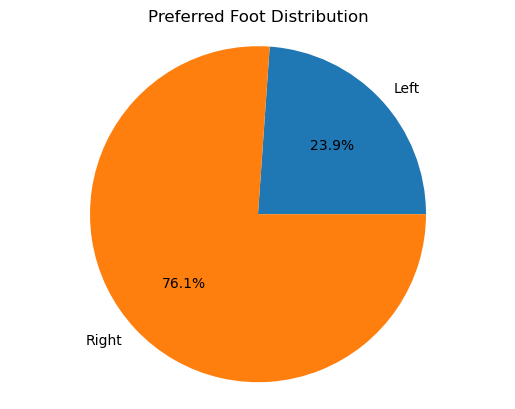

In [10]:
# Pie Chart Creation - Preferred Foot
# Counting the number of players with respect to their preferred foot
left_footed = data_cleaned[data_cleaned['Preferred Foot'] == 'Left'].shape[0]
right_footed = data_cleaned[data_cleaned['Preferred Foot'] == 'Right'].shape[0]
preferred_foot = [left_footed, right_footed]

# Creating a pie chart
fig, ax = plt.subplots()
ax.pie(preferred_foot, labels=['Left', 'Right'], autopct='%1.1f%%')
ax.axis('equal')
plt.title('Preferred Foot Distribution')

plt.savefig('preferred-foot.jpg', format='jpeg') # save image
plt.show()

In [11]:
# Bar Plot Creation - Top 6 Players
# Extracting the top 6 players based on their overall rating
top_6_players = data_cleaned.sort_values(
    by='↓OVA', ascending=False
).head(6)[['Name', '↓OVA']]
top_6_players

,Name,↓OVA
0,L. Messi,93
1,Cristiano Ronaldo,92
2,J. Oblak,91
3,K. De Bruyne,91
4,Neymar Jr,91
5,R. Lewandowski,91


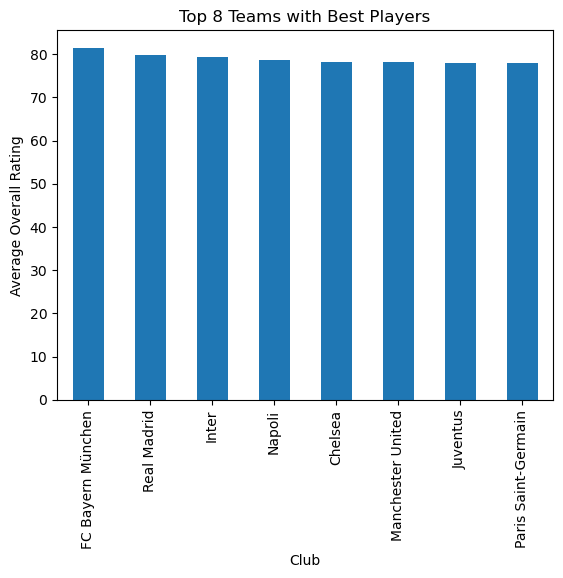

In [12]:
# Bar Plot Creation - Top 8 Teams with Best Players
# Extracting the top 8 teams with the best players
top_8_teams = data_cleaned.groupby('Club')['↓OVA'].mean().sort_values(
    ascending=False
).head(8)

# Creating a bar plot
fig, ax = plt.subplots()
top_8_teams.plot(kind='bar', ax=ax)
plt.title('Top 8 Teams with Best Players')
plt.ylabel('Average Overall Rating')
plt.xlabel('Club')

plt.savefig('top-8-teams.jpg', format='jpeg') # save image
plt.show()

In [13]:
data_cleaned['Value']

0        103.5e6
1           63e6
2          120e6
3          129e6
4          132e6
          ...   
18974      100e3
18975      130e3
18976      120e3
18977      100e3
18978      100e3
Name: Value, Length: 18979, dtype: object

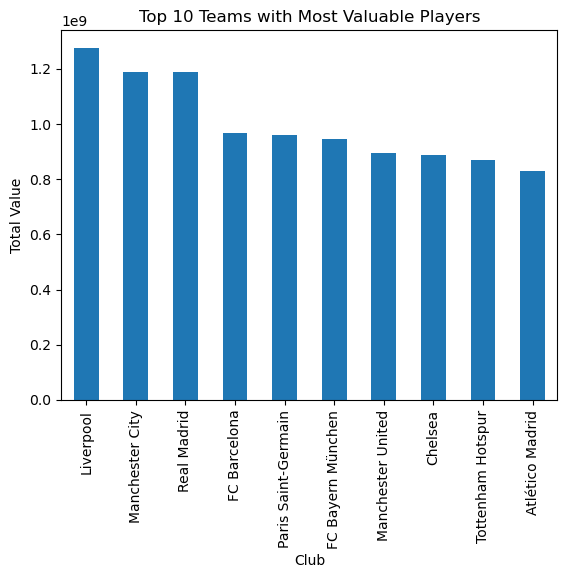

In [14]:
# Bar Plot Creation - Top 10 Teams with most Valuable Players

# Converting the Value column to a numeric data type, e for exponent
data_cleaned['Value'] = pd.to_numeric(data_cleaned['Value'])

# Extracting the top 10 teams with the most valuable players
top_10_teams = data_cleaned.groupby('Club')['Value'].sum().sort_values(
    ascending=False
).head(10)

# Creating a bar plot
fig, ax = plt.subplots()
top_10_teams.plot(kind='bar', ax=ax)
plt.title('Top 10 Teams with Most Valuable Players')
plt.ylabel('Total Value')
plt.xlabel('Club')

plt.savefig('top-10-teams.jpg', format='jpeg') # save image
plt.show()

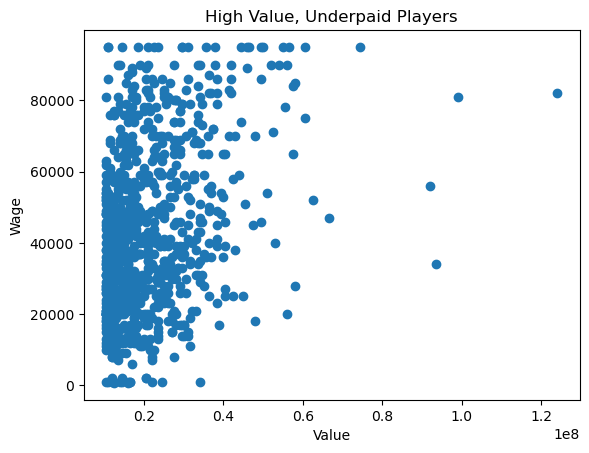

In [17]:
# Scatter Plot Creation - High Value, Underpaid Players
# replace the '€' and 'M' characters in the Value column
data_cleaned['Value'] = data_cleaned['Value'].apply(
    lambda x: x.replace('€', '').replace('M', 'e6').replace('K', 'e3')
    if isinstance(x, str) else x
)
data_cleaned['Wage'] = data_cleaned['Wage'].apply(
    lambda x: x.replace('€', '').replace('M', 'e6').replace('K', 'e3')
    if isinstance(x, str) else x
)

#convert the Wage column to a numeric data type
data_cleaned['Wage'] = pd.to_numeric(data_cleaned['Wage'])


# Extracting the high value, underpaid players
high_value_underpaid = data_cleaned[
    (data_cleaned['Value'] > 1e7) & (data_cleaned['Wage'] < 1e5)
]

# Creating a scatter plot
fig, ax = plt.subplots()
ax.scatter(high_value_underpaid['Value'], high_value_underpaid['Wage'])
plt.title('High Value, Underpaid Players')
plt.ylabel('Wage')
plt.xlabel('Value')

plt.savefig('high-value-underpaid.jpg', format='jpeg') # save image
plt.show()